In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

import numpy as np

In [2]:
data = load_wine()

In [3]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
#The target variable y is used for exploratory data analysis purposes. KMeans is an unsupervised learning algorithm and y will be dropped later
x = pd.DataFrame(data.data, columns = data.feature_names)
xy = x.copy()
xy['target'] = data.target
xy.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Performing Exploratory Data Analysis
1) How many features?

2) How many data records?

3) Are there any missing values?


In [5]:
#Display concise summary of dataset
xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
#Summary statistics of full dataset
xy.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
#Checking for missing values
xy.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [8]:
#Checking for duplicate values
xy.duplicated().sum()

0

In [9]:
print(f'number of features: {xy.shape[1] - 1}') #minus target
print(f'number of records: {xy.shape[0]}')

number of features: 13
number of records: 178


### Exploratory Data Analysis Summary
1) How many features: 13

2) How many data records: 178

3) Are there any missing values: No missing or duplicated values

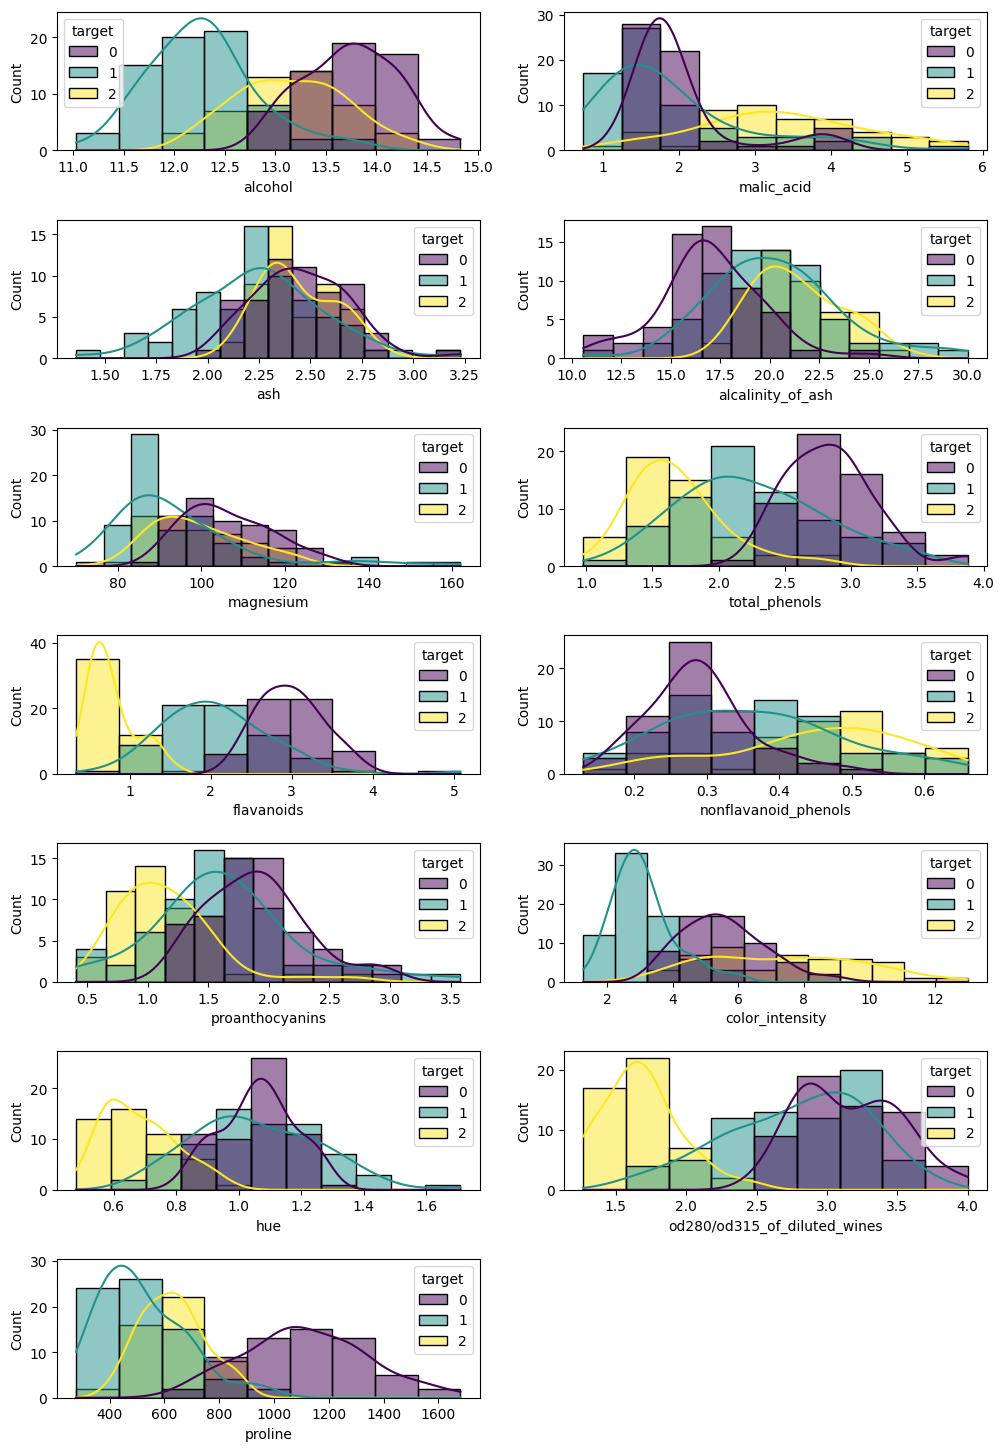

In [10]:
#Data visualization on the full dataset
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col in xy.columns[:-1]:
  plt.subplot(7,2,i)
  sns.histplot(data=xy, x=col, kde=True, hue='target', multiple='layer', alpha=0.5, palette='viridis')
  i += 1

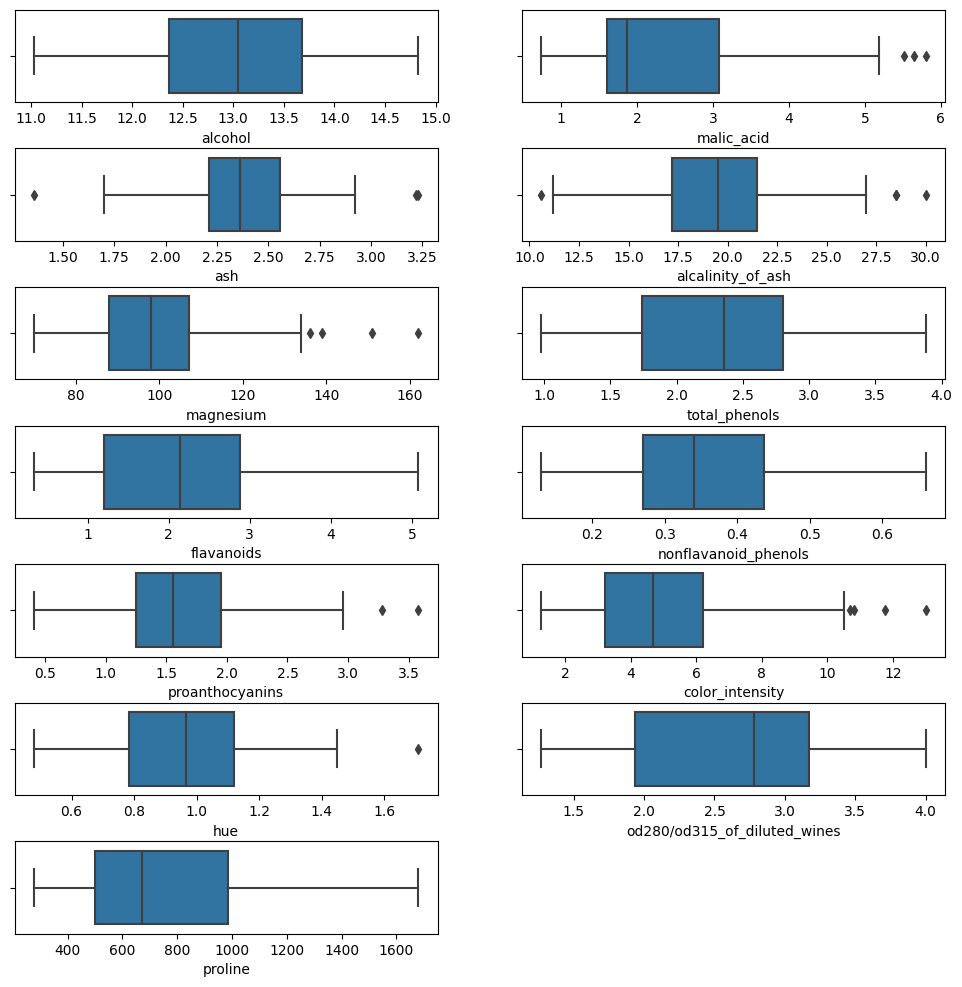

In [11]:
# Boxplots visualization
fig, axes = plt.subplots(nrows=7,ncols=2,figsize=(12,12))

for i, j in enumerate(xy.columns[:-1]):
  sns.boxplot(x=xy[j], ax=axes[i//2,i%2])

fig.delaxes(axes[6,1])
plt.subplots_adjust(hspace=0.5)

There seems to be some outlier presence in some of the feature records. KMeans clustering uses distance computation and can be affected by outlier values.
- ash
- alcalinity_of_ash
- magnesium
- proanthocyanins
- color_intensity
- hue

In [12]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

By performing Min Max normalization, the data points distance to the cluster centroid are computed based on the normalized data, reducing the effect of the value magnitude.

### KMeans modelling
- Now that the dataset is prepared and outlier is handled by normalization, the full dataset is ready for modelling.
- The target is the subject of interest and hence, excluded from the unsupervised KMeans clustering algorithm.

In [14]:
scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [20]:
#Baseline model
kmeans = KMeans(n_init='auto')
kmeans.fit(scaled_df)

cluster_labels = kmeans.labels_

SH = metrics.silhouette_score(scaled_df, cluster_labels)
CH = metrics.calinski_harabasz_score(scaled_df, cluster_labels)
DB = metrics.davies_bouldin_score(scaled_df, cluster_labels)

print ("Silhouette Score : ", SH)
print ("Calinski Harabasz Score : ", CH)
print ("Davies Bouldin Score : ", DB)

Silhouette Score :  0.1347288252718305
Calinski Harabasz Score :  39.45076049848853
Davies Bouldin Score :  1.913203162186854


In [21]:
#Identify the optimal value of K
cluster_size = [2, 3, 4, 5, 6, 7]
scores = []

for n in cluster_size:
  kmeans = KMeans(n_clusters=n, n_init='auto')
  kmeans.fit(scaled_df)

  cluster_labels = kmeans.labels_

  SH = metrics.silhouette_score(scaled_df, cluster_labels)
  CH = metrics.calinski_harabasz_score(scaled_df, cluster_labels)
  DB = metrics.davies_bouldin_score(scaled_df, cluster_labels)

  scores.append([n, SH, CH, DB])

result = pd.DataFrame(scores, columns = ['size', 'SH', 'CH', 'DB'])
result

,size,SH,CH,DB
0,2,0.298722,84.708504,1.354512
1,3,0.299367,83.317027,1.309591
2,4,0.244449,65.440321,1.628402
3,5,0.243257,54.910257,1.630251
4,6,0.161320,46.462837,1.932884
5,7,0.153263,42.932029,1.828448


In [22]:
print(result.iloc[result['SH'].idxmax()], '\n')
print(result.iloc[result['CH'].idxmax()], '\n')
print(result.iloc[result['DB'].idxmin()])

size     3.000000
SH       0.299367
CH      83.317027
DB       1.309591
Name: 1, dtype: float64 

size     2.000000
SH       0.298722
CH      84.708504
DB       1.354512
Name: 0, dtype: float64 

size     3.000000
SH       0.299367
CH      83.317027
DB       1.309591
Name: 1, dtype: float64


Based on the Silhouette Coefficient, Calinski Harabasz, and Davies Bouldin scores, a harmonious selection of optimal k among this 3 metrics are selected with the following conditions:
- SH: as close to 1 as possible
- CH: as high as possible
- DB: as close to 0 as possible

For this evaluation, optimal K = 3.

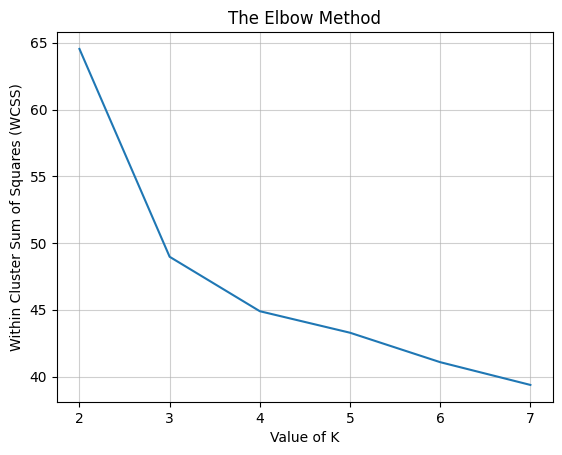

In [23]:
inertia = []
num_of_clusters = np.arange(2,8)
for i in num_of_clusters:
    km = KMeans(n_clusters=i, max_iter=300, random_state=42, n_init='auto')
    km.fit(scaled_df)
    inertia.append(km.inertia_)

plt.plot(num_of_clusters, inertia)
plt.xlabel("Value of K")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("The Elbow Method")
plt.grid(alpha=0.6)
plt.show()

 This is further confirmed by the within-cluster sum of squares Elbow plot illustrated below. The noticeable bend (elbow) indicates that subsequent additions of clusters beyond this point do not result in a substantial reduction in WCSS, suggesting that this point is likely to be the optimal number of clusters. Based on the plot, the "elbow" is observed at k = 3.Therefore, k=3 will be selected for the optimal k value.

In [24]:
#KMeans with optimal K value
kmeans2 = KMeans(n_clusters=3, n_init='auto')
kmeans2.fit(scaled_df)

cluster_labels2 = kmeans2.labels_

SH = metrics.silhouette_score(scaled_df, cluster_labels2)
CH = metrics.calinski_harabasz_score(scaled_df, cluster_labels2)
DB = metrics.davies_bouldin_score(scaled_df, cluster_labels2)

print ("Silhouette Score : ", SH)
print ("Calinski Harabasz Score : ", CH)
print ("Davies Bouldin Score : ", DB)

Silhouette Score :  0.2997081530816114
Calinski Harabasz Score :  83.26428898244768
Davies Bouldin Score :  1.321049105842404


# Discussing performance metrics

### Silhouette Coefficient Score
The silhouette coefficient score is a measure of cohension and separation.
- Cohesion represents how homogeneous the data points within the cluster are with each other.

- Separation represents how heterogeneous the datapoints are between clusters .

It ranges between the values of -1 and 1 where
- -1 represents incorrect clustering
- 0 represents overlapping clusters
- 1 represents highly dense clusters

For clustering, a higher silhouette score is preferred, illustrating better defined clusters.

In this case, the optimized KMeans model has a Silhouette Coefficient score of 0.299. This suggest that despite some clustering is being done correctly, the clusters are still not as distinct and some overlaps of datapoints may be observed.


### CH Index
The CH Index measures the ratio of between-cluster variance to within-cluster variance, or how similar a data point is to its own cluster compared to other clusters (link). The CH score serves as an indicator of the optimal number of clusters.

A high score indicates better defined clusters; however, there is no maximum score here - generally the higher the number of clusters, the higher the CH score.

Instead, the number of clusters that provides a peak or abrupt spike in the CH score seems to be the optimal number of clusters.

In this case, the optimized KMeans model has a CH Index of 83.26. This value can be compared with other models to determine its performance.